<a href="https://colab.research.google.com/github/SAntimang/Aprendiendo-Python---Github/blob/master/dds_regresion_logistica_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regresión Logística

**Diplomado en Data Science Versión 2024** <br>
**Facultad de Matemáticas**<br>
**Pontificia Universidad Católica de Chile**

---

Hoy nuestro interés estará centrado en la probabilidad de ocurrencia de determinandos eventos, dados algunos eventos externos y que ya han ocurrido. Denotemos:

$$
\mathbb{P}(Y_i=1\mid X=x_i)=\pi_i
$$

como la probabilidad de ocurrencia del fenómeno binario (o Bernoulli) $Y_i$ (donde 1 significa que el evento ocurre) dados los eventos conocidos $x_i$. Entonces $Y_i$ se denomina **variable respuesta** y $x_i$ es un conjunto de **predictores, covariables o variables independientes**.


Para ejempificar esto, consideremos una empresa de telecomunicaciones. Simulemos que nos interesa calcular la probabilidad de que el cliente N°5 finalize su contrato en la empresa, dado que lleva dos meses de antiguedad. Entonces, nuestro interés se centra en:

$$
\mathbb{P}(\text{FinalizaContrato}_5=1\mid\text{Antigüedad}=2)=\pi_5
$$

**¿Qué son las chances?**

Seguramente han escuchado una frase similar a "las chances de que gane tal caballo es de 3 a 1", es decir, de cuatro carreras, el caballo gana tres y pierde una. En otros términos:
* La probabilidad de que gane el caballo la carrera es $\pi={\text{casos favorables} \over \text{casos posibles}} = 3/4$.
* Las chances de que gane el caballo la carrera es de ${\pi \over 1 - \pi}={0.75 \over 1-0.75}=$ 3 a 1.

Basicamente las chances son una segunda forma de señalar la cantidad de evidencia hacia la ocurrencia de un evento y especialmente, son la base del modelo de regresión logística.

### La Regresión Logística

La **regresión logística** sirve para modelar la probabilidad de ocurrencia de un evento dado un conjunto de predictores en base a información del pasado. Se enmarca en el conjunto de **modelos lineales generalizados** o GLM por sus siglas en inglés.

Por conveniencia matemática, la regresión logística modela el **logaritmo de las chances de que ocurra el evento** (tambien conocidas como **log-chances** o **logits**). Es decir, se puede denotar de la siguiente forma:

$$
\log{\left(\pi_i \over 1 - \pi_i\right)} = \beta_0 + \beta_1 x_{i1} + \dots + \beta_n x_{in}
$$

O sea, buscar modelar los *logits* como una combinación lineal de los predictores. Entonces, el interés es obtener estimaciones de los parámetros $\beta_0, \beta_1, \dots, \beta_n$.

Luego de estimar los parámetros de interés del modelo y con un poco de manipulación respecto al modelo mostrado, la probabilidad de ocurrencia del evento de interés esta dada por la siguiente fórmula:

$$
\hat\pi_i = {\exp{(\hat\beta_0 + \hat\beta_1 x_{i1} + \dots + \hat\beta_n x_{in})} \over 1 + \exp{(\hat\beta_0 + \hat\beta_1 x_{i1} + \dots + \hat\beta_n x_{in})}}
$$

En este caso, el acento circunflejo ^, hace referencia a que los valores corresponden a estimaciones de los parámetros de interés. Para obtener estas estimaciones, debemos tener un conjunto de datos que contenga observaciones para todas las variables independientes y la variable respuesta. El conjunto de datos debe ser representativo de la población o del fenómeno que se está estudiando.

Para el ejemplo de modelar la probabilidad de fuga de un cliente dado que lleva dos meses en la empresa, consideremos la base de datos `EmpresaServicios.xlsx` que  contiene información de los clientes de esta empresa y que decidieron finalizar su contrato, o que a la fecha aún lo mantienen. Las variables de esta base de datos son las siguientes:

* `Sexo`: Sexo del titular (Mujer, Hombre)
* `TipoCliente`: Indica si el cliente es premium o regular
* `MasUnPlan`: Si el titular posee más de un plan asociado.
* `MultipleServicios`: Si cliente posee internet y telefonía o solo internet.
* `Antiguedad`: Antigüedad del contrato (meses).
* `Edad`: Edad en años del titular de la cuenta.
* `Beneficios`: Si cliente accede a los beneficios de descuentos
* `ParticipoEvento`: Si cliente participó de evento online de empresa.
* `AsisteSucursal`: Si cliente asiste muchas, pocas o ninguna vez a sucursal.
* `DeudaMembresia`: Si cliente presenta atraso por pagar su cuenta.
* `PagaporServicio`: Monto de dinero que el cliente paga por su servicio
* `Churn`: Si cliente finaliza o mantiene el contrato vigente (variable respuesta).

Carguemos los datos y luego veamos algunos gráficos y tablas asociados a la variable respuesta.

In [ ]:
# Librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones para evitar notación científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: f"{x:0.5f}")

# Configuración de los gráficos
plt.style.use("ggplot")
%config InlineBackend.figure_format = "retina"

# Cargamos datos
data = pd.read_excel("EmpresaServicios.xlsx")
display(data.head())

,Sexo,TipoCliente,MasUnPlan,MultipleServicios,Antiguedad,Edad,Beneficios,ParticipoEvento,AsisteSucursal,DeudaMembresia,PagaporServicio,Churn
0,Mujer,Regular,No,Solo Internet,67,31,No Accede a Beneficios,No Participa,Una o ninguna vez,No Deudor,16.90000,Finaliza Contrato
1,Mujer,Regular,Si,Solo Internet,63,42,Accede a Beneficios,No Participa,Una o ninguna vez,No Deudor,14.30000,Mantiene Contrato
2,Mujer,Regular,No,Internet y Telefono,37,37,No Accede a Beneficios,No Participa,Una o ninguna vez,No Deudor,19.40000,Mantiene Contrato
3,Mujer,Regular,No,Solo Internet,67,43,No Accede a Beneficios,No Participa,Una o ninguna vez,No Deudor,19.70000,Finaliza Contrato
4,Mujer,Regular,No,Solo Internet,75,44,No Accede a Beneficios,No Participa,Una o ninguna vez,No Deudor,15.80000,Mantiene Contrato


In [ ]:
conteos     = data["Churn"].value_counts()
porcentajes = data["Churn"].value_counts(normalize=True)

tabla = pd.concat([conteos, porcentajes], axis=1)
tabla.columns = ["Cuenta", "Porcentaje"]
display(tabla)

,Cuenta,Porcentaje
Churn,,
Mantiene Contrato,1920,0.64000
Finaliza Contrato,1080,0.36000


In [ ]:
%pip install estyp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from estyp.testing import t_test

t_test(data.query("Churn == 'Finaliza Contrato'").Antiguedad, data.query("Churn == 'Mantiene Contrato'").Antiguedad)


    Welch's Two Sample t-test
    T = -13.6985 | df = 2221.90 | p-value = <0.0001
    alternative hypothesis: true difference in means is not equal to 0
    95 percent confidence interval:
     -7.464062 -5.594618
    sample estimates:
      [mean of x, mean of y]: [54.047222, 60.576563]
    

Churn,Finaliza Contrato,Mantiene Contrato
count,1080.00000,1920.00000
mean,54.04722,60.57656
std,12.56636,12.46901
min,14.00000,18.00000
25%,45.75000,52.00000
50%,54.00000,61.00000
75%,63.00000,69.00000
max,97.00000,99.00000


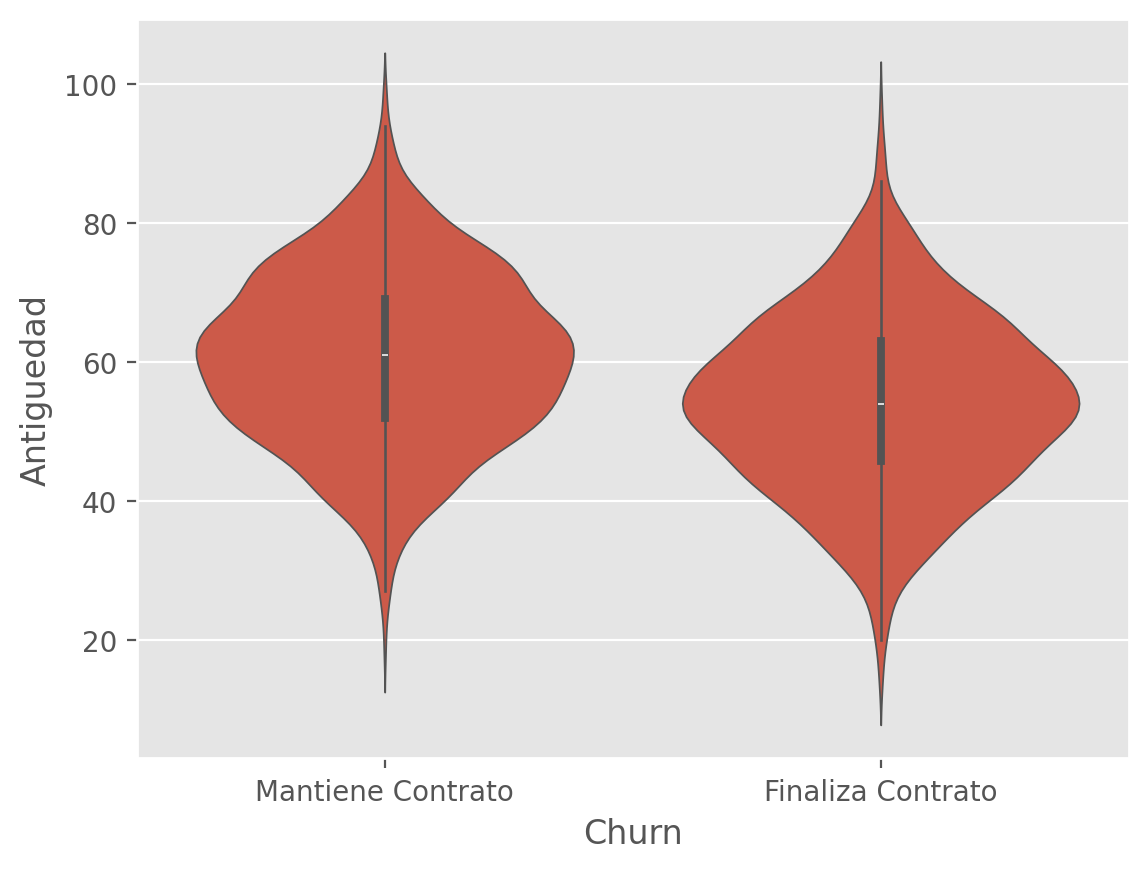

In [ ]:
antiguedad_segun_churn = data.groupby("Churn")["Antiguedad"].describe()
display(antiguedad_segun_churn.T)
sns.violinplot(
    data  = data,
    x     = "Churn",
    y     = "Antiguedad",
    order = ["Mantiene Contrato", "Finaliza Contrato"]
);

El modelo que buscamos realizar considera solo la antigüedad del cliente y es el siguiente:

$$
\log{\left(\pi_i \over 1 - \pi_i\right)} = \beta_0 + \beta_1 \cdot \text{Antigüedad}_i
$$


Para realizarlo en Python, utilizaremos el módulo `api` la librería `statsmodels` nuevamente.

In [ ]:
import statsmodels.api as sm

Para realizar el modelo, utilizaremos la clase `Logit` del módulo `api` que cargamos previamente. Para utilizar esta clase, la variable respuesta debe estar codificada con los valores 0 y 1 (donde 1 significa que ocurrió el evento de interés).

In [ ]:
data["Churn_num"] = np.where(data["Churn"] == "Finaliza Contrato", 1, 0)

In [ ]:
modelo_antig = sm.Logit.from_formula(
    formula = "Churn_num ~ Antiguedad",
    data    = data
).fit()
modelo_antig.summary2()

Optimization terminated successfully.
         Current function value: 0.623008
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Churn_num        Pseudo R-squared: 0.047     
Date:               2023-10-18 17:13 AIC:              3742.0456 
No. Observations:   3000             BIC:              3754.0583 
Df Model:           1                Log-Likelihood:   -1869.0   
Df Residuals:       2998             LL-Null:          -1960.3   
Converged:          1.0000           LLR p-value:      1.4046e-41
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     1.8106    0.1859    9.7388  0.0000   1.4462   2.1749
Antiguedad   -0.0416    0.0032  -12.9414  0.0000  -0.0479  -0.0353
=================================================================

"""

Viendo los coeficientes de la parte inferior de la tabla, como resultado obtenemos que $\hat\beta_0=1.8106$ (`Intercept`) y $\hat\beta_1=-0.0416$ (`Antiguedad`). Reemplazando en la fórmula del modelo de regresión logística obtenemos:

$$
\mathbf\log{\left(\hat\pi_i \over 1 - \hat\pi_i\right)} = \hat\beta_0 + \hat\beta_1 \cdot \text{Antigüedad}_i = 1.8106 - 0.0416 \cdot \text{Antigüedad}_i
$$

Y finalmente, la probabilidad estimada $\pi_i$ estará dada por:

$$
\hat\pi_i = {\exp{(\hat\beta_0 + \hat\beta_1 \cdot \text{Antigüedad}_i)} \over 1 + \exp{(\hat\beta_0 + \hat\beta_1 \cdot \text{Antigüedad}_i)}}= {\exp{(1.8106 - 0.0416 \cdot \text{Antigüedad}_i)} \over 1 + \exp{(1.8106 - 0.0416 \cdot \text{Antigüedad}_i)}}
$$

Veamos el gráfico que resulta de obtener las probabilidades estimadas para distintos valores de la antigüedad de los clientes.

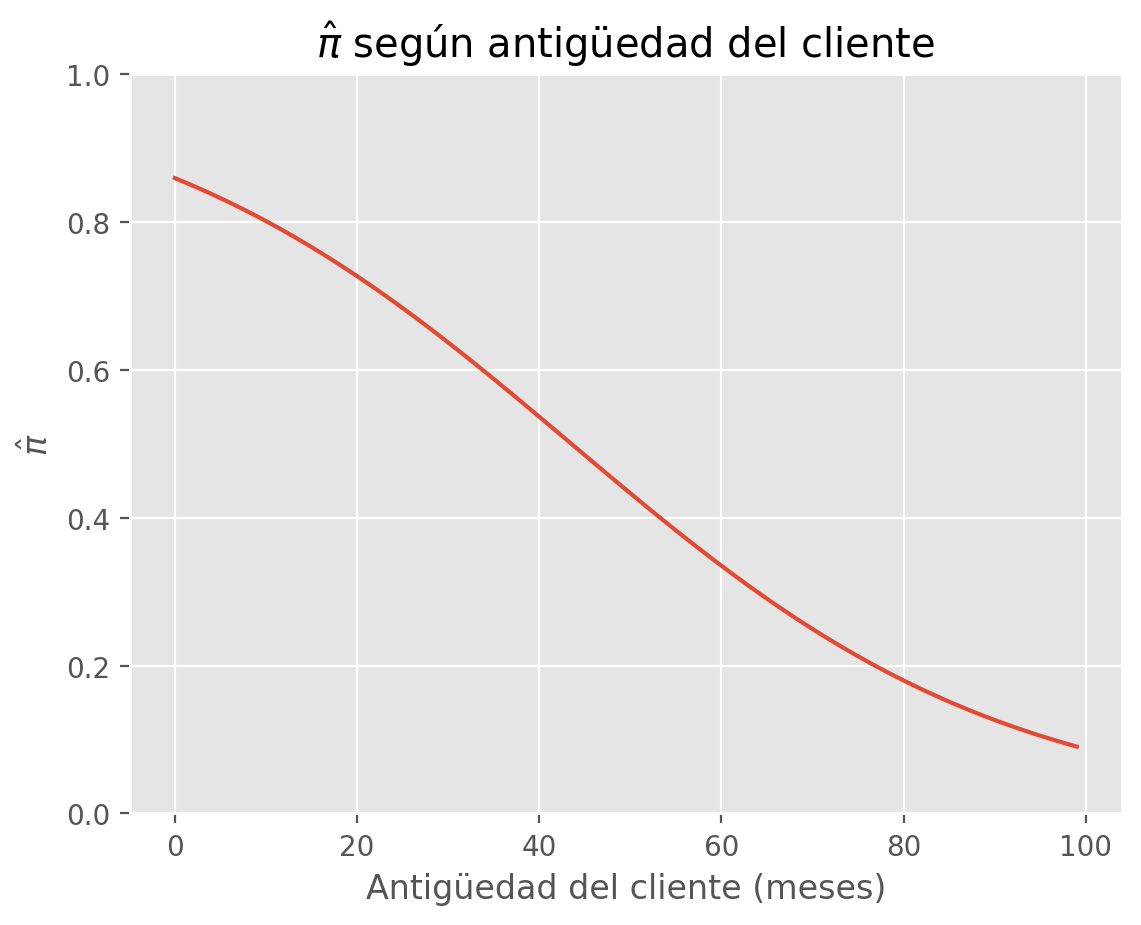

In [ ]:
def pi(antiguedad):
    exp = np.exp(1.8106 - 0.0416 * antiguedad)
    return exp / (1 + exp)

antiguedades = np.arange(0, 100)
probs_churn  = pi(antiguedades)

sns.lineplot(x=antiguedades, y=probs_churn, ax=ax)
plt.title(r"$\hat\pi$ según antigüedad del cliente")
plt.xlabel("Antigüedad del cliente (meses)")
plt.ylabel(r"$\hat\pi$")
plt.ylim(0, 1);

El cálculo de que el cliente se fugue, dado que lleva dos meses en la empresa está dado por:

In [ ]:
prob_fuga = pi(2)
print(f"Probabilidad de fuga: {prob_fuga:0.3f}")

Probabilidad de fuga: 0.849


Es decir, $\mathbb{P}(\text{FinalizaContrato}_5=1\mid\text{Antigüedad}=2)=0.849$

Ahora, supongamos que es de interés crear una regla de decisión para decidir cuando el cliente se fugará. En este contexto, usted decide que cuando la probabilidad de fuga exceda 0.5, el cliente potencialmente se fugará. Necesitaremos saber que valores de antigüedad satisfacen la siguiente inecuación:


$$
\hat\pi_i = {\exp{(1.8106 - 0.0416 \cdot \text{Antigüedad}_i)} \over 1 + \exp{(1.8106 - 0.0416 \cdot \text{Antigüedad}_i)}} > 0.5 \\
 \longleftrightarrow \text{Antigüedad}_i < 43.524
$$

Despejando la variable $\text{Antigüedad}_i$ con álgebra, resulta que cuando la antigüedad de un cliente es menor a 43.524 ([fuente](https://www.wolframalpha.com/input?i=exp%281.8106+-+0.0416+*+x%29+%2F+%281+%2B+exp%281.8106+-+0.0416+*+x%29%29+%3E+0.5+solve+for+x&lang=es)), la probabilidad de fuga según el modelo estimado es mayor a 0.5.

**Variables Indicadoras o Dummies**

A continuación, realicemos un modelo de regresión logística con una mayor cantidad de predictores:

$$
\log{\left(\pi_i \over 1 - \pi_i\right)} = \beta_0 + \beta_1 \cdot \mathbb{I}_{\{\text{DeudaMembresia}_i=\text{Deudor}\}} + \beta_2 \cdot \mathbb{I}_{\{\text{MasUnPlan}_i=\text{Si}\}} + \beta_3 \cdot \text{Antigüedad}_i
$$

Para implementar este modelo, en la formula debemos fijar una categoría como referencia en las variables cualitativas con la sintaxis <br> `"C(variable, Treatment('categoria de referencia'))"`:

In [ ]:
modelo = sm.Logit.from_formula(
    formula = """
        Churn_num ~
            C(DeudaMembresia, Treatment('No Deudor')) +
            C(MasUnPlan, Treatment('No')) +
            Antiguedad
    """,
    data = data
).fit()
modelo.summary2()

Optimization terminated successfully.
         Current function value: 0.607783
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Method:                      MLE       
Dependent Variable:              Churn_num                   Pseudo R-squared:            0.070     
Date:                            2023-10-18 17:15            AIC:                         3654.7002 
No. Observations:                3000                        BIC:                         3678.7257 
Df Model:                        3                           Log-Likelihood:              -1823.4   
Df Residuals:                    2996                        LL-Null:                     -1960.3   
Converged:                       1.0000                      LLR p-value:                 4.6279e-59
No. Iterations:                  5.0000                      Scale:                       1.0000    
----------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------------
Intercept                                            2.0005   0.1912  10.4608 0.0000  1.6256  2.3753
C(DeudaMembresia, Treatment('No Deudor'))[T.Deudor]  0.5682   0.1676   3.3904 0.0007  0.2397  0.8966
C(MasUnPlan, Treatment('No'))[T.Si]                 -1.0341   0.1237  -8.3620 0.0000 -1.2765 -0.7917
Antiguedad                                          -0.0429   0.0033 -13.1024 0.0000 -0.0494 -0.0365
====================================================================================================

"""

El modelo estimado es el siguiente:

$$
\begin{align*}
\log{\left(\hat\pi_i \over 1 - \hat\pi_i\right)} &= 2 + 0.567 \cdot \mathbb{I}_{\{\text{DeudaMembresia}_i=\text{Deudor}\}} -1.034 \cdot \mathbb{I}_{\{\text{MasUnPlan}_i=\text{Si}\}} -0.043 \cdot \text{Antigüedad}_i
\end{align*}
$$

Supongamos que necesitamos obtener la probabilidad de fuga del siguiente cliente:

* `DeudaMembresia`: $\color{violet}{\text{Deudor}}$.
* `MasUnPlan`: $\color{red}{\text{No}}$
* `Antiguedad`: $\color{orange}{\text{5 meses}}$

$$
\hat\pi_i =
{
    \exp{(2 + 0.567 \cdot \color{violet}{1} -1.034 \cdot \color{red}{0} -0.043 \cdot \color{orange}{5})}
    \over
    1 + \exp{(2 + 0.567 \cdot \color{violet}{1} -1.034 \cdot \color{red}{0} -0.043 \cdot \color{orange}{5})}
} = 0.9132
$$

**Razón de Chances** (***Odds Ratio***)

Retomando el ejemplo de que un caballo "A" gane la carrera es 3 a 1, también suponga que hay otros caballos:
* Caballo A (el que vimos anteriormente): tienen chances de ganar la carrera de 3 a 1.
* Caballo B: tienen chances de ganar la carrera de 2 a 1.
* Caballo C: tienen chances de ganar la carrera de 4 a 1.

Interesa saber cuántas chanches más tienen de ganar el caballo A, respecto a los otros caballos.

Para responder a esta necesidad, se utilizan las razones de chances, que están dadas por la siguiente fórmula:

$$
\text{Odds Ratio} = {\text{Chances del Evento 1} \over \text{Chances del Evento 2}}
$$

* Entonces, el Odds Ratio entre el caballo A y el B es de $3/2=1.5$, o sea, el caballo A tiene 50% más de chances de ganar la carrera que el caballo B.  
* Por otro lado, el Odds Ratio entre el caballo A y el C es de $3/ 4=0.75$, o sea, el caballo A tiene un 25% menos de chances de ganar la carrera que el caballo C.

En el caso de la fuga de los clientes, supongamos que nos interesa calcular cuantas chances hay de que un cliente se fuge cuando es un mes más antiguo. Definamos a este cliente en ambos meses:
* Cliente~1~: Es el cliente con una antigüedad de $x$ meses.
* Cliente~2~: Es el mismo cliente pero tiene una antigüedad de $x+1$ meses.

Calculemos las chances considerando que el modelo entrega las **log-chances** de que el cliente se fugue.

$$
{\color{green}{\text{Chances del Cliente}_1} \over \color{blue}{\text{Chances del Cliente}_2}} =  {\color{green}{\exp\left\{\beta_0 + \beta_1 \cdot \mathbb{I}_{\{\text{DeudaMembresia}_i=\text{Deudor}\}} + \beta_2 \cdot \mathbb{I}_{\{\text{MasUnPlan}_i=\text{Si}\}} + \beta_3 \cdot (x+1) \right\}} \over \color{blue}{\exp\left\{\beta_0 + \beta_1 \cdot \mathbb{I}_{\{\text{DeudaMembresia}_i=\text{Deudor}\}} + \beta_2 \cdot \mathbb{I}_{\{\text{MasUnPlan}_i=\text{Si}\}} + \beta_3 \cdot x \right\}} }
$$

Utilizando propiedades de las potencias, obtenemos el siguiente resultado:

$$
\text{Odds Ratio} = {\text{Chances del Cliente}_1 \over \text{Chances del Cliente}_2} = \exp\{\beta_3\}
$$

O sea, independiente de la cantidad de meses de antigüedad, el Odds Ratio cuando el cliente es un mes más antiguo es $\exp\{\beta_3\}$. Este resultado también aplica para el resto de los predictores, cuando se desea calcular el Odds Ratio para evaluar el cambio en una unidad. O sea también se cumple que:

* Odds ratio de "Cliente Deudor" respecto a "Ciente No Deudor" es igual a $\exp\{\beta_1\}$.
* Odds ratio de "Cliente con más de un plan" respecto a "Ciente con un Plan" es igual a $\exp\{\beta_2\}$.

Obtengamos estimaciones de los Odds Ratios mediante el modelo estimado:

In [ ]:
odds_ratio = np.exp(modelo.params[1:]) # Se utiliza [1:] para excluir intercepto
print("Razones de chances:")
print(odds_ratio)

Razones de chances:
C(DeudaMembresia, Treatment('No Deudor'))[T.Deudor]   1.76502
C(MasUnPlan, Treatment('No'))[T.Si]                   0.35554
Antiguedad                                            0.95796
dtype: float64


Esto quiere decir que:

* Un "Cliente Deudor" tiene un 76.5% (1.76502-1) más de chances de fugarse que un "Cliente No Deudor".
* Un cliente con "Más de un plan" tiene un 64.4% (1 - 0.35554) menos de chances de fugarse que un cliente con "Un Plan".
* Un cliente tiene 4.2% (1 - 0.95796) menos de chances de fugarse, por cada mes de antigüedad que lleva en la empresa.

Además, se pueden clasificar los Odds Ratio de la siguiente forma:
* $\text{Odds Ratio}>1$: El predictor es un **Factor de Riesgo**.
* $\text{Odds Ratio}<1$: El predictor es un **Factor Protector**.
* $\text{Odds Ratio}=1$: **No hay efecto** por parte del predictor.


Se pueden obtener intervalos de confianza al 95% para los Odds Ratio mediante el método `conf_int()` del modelo ajustado.

In [ ]:
ic95_odds_ratio = np.exp(modelo.conf_int().iloc[1:, :])
ic95_odds_ratio.columns = ["[2.5%", "97.5%]"]

print("- Intervalo de confianza al 95% para los Odds Ratio:")
display(ic95_odds_ratio)

- Intervalo de confianza al 95% para los Odds Ratio:


,[2.5%,97.5%]
"C(DeudaMembresia, Treatment('No Deudor'))[T.Deudor]",1.27088,2.45128
"C(MasUnPlan, Treatment('No'))[T.Si]",0.27901,0.45306
Antiguedad,0.95182,0.96413


Como ninguno de los intervalos de confianza al 95% contiene al valor 1, hay evidencia estadística respecto a que todos los predictores son Factores de Riesgo o Factores Protectores:

* `DeudaMembresia="Deudor"`: Factor de Riesgo.
* `MasUnPlan="Si"`: Factor Protector.
* `Antiguedad`: Factor Protector.

**Inferencia sobre los parámetros**

La tabla que se obtiene con el método `summary2()` entrega los valores-p asociados a la siguiente familia de hipótesis.

$$
H_0:\beta_i = 0 \\
H_1:\beta_i \not= 0
$$

Para todos los coeficientes $\beta_i$ del modelo. Se rechaza $H_0$ si el valor-p es menor a un nivel de significancia $\alpha$ (usualmente 0.05).

Trabajemos con $\alpha=0.05$ ¿Qué hacemos cuando tenemos muchos parámetros con un valor-p asociado mayor a 0.05?

Realicemos un modelo con aún más predictores:




In [ ]:
modelo = sm.Logit.from_formula(
    formula = """
        Churn_num ~
            C(DeudaMembresia, Treatment('No Deudor')) +
            C(TipoCliente, Treatment('Regular')) +
            C(MasUnPlan, Treatment('No')) +
            C(Sexo, Treatment('Hombre')) +
            Edad +
            PagaporServicio +
            Antiguedad
    """,
    data = data
).fit()
modelo.summary2()

Optimization terminated successfully.
         Current function value: 0.597177
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Method:                      MLE       
Dependent Variable:              Churn_num                   Pseudo R-squared:            0.086     
Date:                            2023-10-18 17:15            AIC:                         3599.0619 
No. Observations:                3000                        BIC:                         3647.1128 
Df Model:                        7                           Log-Likelihood:              -1791.5   
Df Residuals:                    2992                        LL-Null:                     -1960.3   
Converged:                       1.0000                      LLR p-value:                 5.9849e-69
No. Iterations:                  6.0000                      Scale:                       1.0000    
----------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------------
Intercept                                            2.4434   0.3568   6.8486 0.0000  1.7441  3.1426
C(DeudaMembresia, Treatment('No Deudor'))[T.Deudor]  0.5879   0.1697   3.4637 0.0005  0.2552  0.9206
C(TipoCliente, Treatment('Regular'))[T.Premium]     -1.0836   0.1495  -7.2486 0.0000 -1.3766 -0.7906
C(MasUnPlan, Treatment('No'))[T.Si]                 -1.0562   0.1248  -8.4626 0.0000 -1.3009 -0.8116
C(Sexo, Treatment('Hombre'))[T.Mujer]                0.0994   0.0812   1.2230 0.2213 -0.0599  0.2586
Edad                                                -0.0069   0.0065  -1.0567 0.2906 -0.0198  0.0059
PagaporServicio                                     -0.0004   0.0017  -0.2106 0.8332 -0.0036  0.0029
Antiguedad                                          -0.0443   0.0033 -13.2994 0.0000 -0.0508 -0.0377
====================================================================================================

"""

En este caso, y al igual que con el modelo de regresión lineal, debemos realizar una eliminación de variables de forma **secuencial**. No hacerlo de esta forma puede llevar a eliminar variables que son significativas sin la presencia de otras variables.

Una diferencia, es que no usamos la tabla ANOVA, sino que realizamos el Test F de Modelos Anidados.

Utilizamos la misma clase `Stepwise()` del módulo `linear_model` de la librería ESTYP. También contamos con la opción de realizar la selección con los criterios AIC y BIC en caso de que se desee.


In [ ]:
% pip install estyp

In [ ]:
from estyp.linear_model import Stepwise

searcher = Stepwise(
    formula = """
        Churn_num ~
            C(DeudaMembresia, Treatment('No Deudor')) +
            C(TipoCliente, Treatment('Regular')) +
            C(MasUnPlan, Treatment('No')) +
            C(Sexo, Treatment('Hombre')) +
            Edad +
            PagaporServicio +
            Antiguedad
    """,
    data      = data,
    model     = sm.Logit,
    direction = "backward",
    criterion = "f-test"
)
searcher.fit()


- Term dropped: "PagaporServicio" | p-value: 0.8474
- Term dropped: "Edad" | p-value: 0.3369
- Term dropped: "C(Sexo, Treatment('Hombre'))" | p-value: 0.2711
Backward selection completed
- Dropped terms: 3
- Obtained formula: "Churn_num ~ C(DeudaMembresia, Treatment('No Deudor')) + C(TipoCliente, Treatment('Regular')) + C(MasUnPlan, Treatment('No')) + Antiguedad"


In [ ]:
modelo_seleccionado = sm.Logit.from_formula(searcher.optimal_formula_, data=data).fit()
modelo_seleccionado.summary2()

Optimization terminated successfully.
         Current function value: 0.597610
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Method:                      MLE       
Dependent Variable:              Churn_num                   Pseudo R-squared:            0.085     
Date:                            2023-10-18 17:19            AIC:                         3595.6608 
No. Observations:                3000                        BIC:                         3625.6927 
Df Model:                        4                           Log-Likelihood:              -1792.8   
Df Residuals:                    2995                        LL-Null:                     -1960.3   
Converged:                       1.0000                      LLR p-value:                 3.2735e-71
No. Iterations:                  6.0000                      Scale:                       1.0000    
----------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------------
Intercept                                            2.1775   0.1955  11.1396 0.0000  1.7944  2.5606
C(DeudaMembresia, Treatment('No Deudor'))[T.Deudor]  0.5896   0.1695   3.4787 0.0005  0.2574  0.9218
C(TipoCliente, Treatment('Regular'))[T.Premium]     -1.0836   0.1493  -7.2578 0.0000 -1.3762 -0.7910
C(MasUnPlan, Treatment('No'))[T.Si]                 -1.0562   0.1247  -8.4679 0.0000 -1.3006 -0.8117
Antiguedad                                          -0.0442   0.0033 -13.2802 0.0000 -0.0507 -0.0377
====================================================================================================

"""

* Finalmente, todos los predictores del modelo tienen un valor-p menor a 0.05.

El modelo resultante es del tipo:

$$
\log{\left(\pi_i \over 1 - \pi_i\right)} = \beta_0 + \beta_1 \cdot \mathbb{I}_{\{\text{DeudaMembresia}_i=\text{Deudor}\}} + \beta_2 \cdot \mathbb{I}_{\{\text{TipoCliente}_i=\text{Premium}\}} + \beta_4 \cdot \mathbb{I}_{\{\text{MasUnPlan}_i=\text{Si}\}} + \beta_4 \cdot \text{Antigüedad}_i
$$


Ahora, estudiemos mediante el método `predict()`, la probabilidad de fuga de los siguientes clientes:


|   **Predictor**  | **Cliente A** | **Cliente B** |
|:----------------:|:-------------:|:-------------:|
| `DeudaMembresia` |     Deudor    |   No Deudor   |
|   `TipoCliente`  |    Regular    |    Premium    |
|    `MasUnPlan`   |       Si      |       Si      |
|   `Antiguedad`   |       10      |       25      |



In [ ]:
clientes = pd.DataFrame([
    {"DeudaMembresia": "Deudor", "TipoCliente": "Regular", "MasUnPlan": "Si", "Antiguedad": 10},
    {"DeudaMembresia": "No Deudor", "TipoCliente": "Premium", "MasUnPlan": "Si", "Antiguedad": 25}
])

pi_clientes = modelo_seleccionado.predict(clientes)

print("- Clientes de interés:")
display(clientes)
print("- Probabilidades de fuga según modelo:")
print(pi_clientes)

- Clientes de interés:


,DeudaMembresia,TipoCliente,MasUnPlan,Antiguedad
0,Deudor,Regular,Si,10
1,No Deudor,Premium,Si,25


- Probabilidades de fuga según modelo:
0   0.78059
1   0.25602
dtype: float64


### Métricas de Desempeño

* Al ser un modelo de clasiﬁcación, se puede utilizar la matriz de confusión para evaluar el desempeño del modelo.
* Para realizar una evaluación correcta del modelo se debe utilizar una base de datos distinta a la utilizada para ajustar el modelo. Sin embargo, para efectos de este curso, utilizaremos la misma base de datos para evaluar el modelo (nunca deben hacerlo).
* La matriz de confusión es una tabla que muestra la cantidad de predicciones correctas e incorrectas realizadas por el modelo. A partir de ella se pueden calcular distintas métricas de desempeño.
* En las filas de la matriz se encuentran los valores reales de la variable respuesta y en las columnas las predicciones realizadas por el modelo.
* Con la función `pd.crosstab()` se puede realizar esta matriz.

La matriz de confusión tiene la siguiente forma

|   **Matriz de Confusión**  | **Predicción 0** | **Predicción 1** |
|:--------------------------:|:----------------:|:----------------:|
| **Valor Real 0** |     Verdadero Negativo    |   Falso Positivo   |
| **Valor Real 1** |    Falso Negativo    |    Verdadero Positivo    |

In [ ]:
data["Churn"].unique()

array(['Finaliza Contrato', 'Mantiene Contrato'], dtype=object)

In [ ]:
probabilidades_predichas = modelo.predict(data)
etiquetas_predichas = np.where(probabilidades_predichas >= 0.5, 1, 0)

matriz_confusion = pd.crosstab(data["Churn_num"], etiquetas_predichas)
matriz_confusion

col_0,0,1
Churn_num,,
0,1682,238
1,725,355


Solo esta vez utilizaremos `scikit-learn` para calcular las métricas de desmpeño. En especial, utilizaremos la función `classification_report()` del módulo `metrics`.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(data["Churn_num"], etiquetas_predichas))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1920
           1       0.60      0.33      0.42      1080

    accuracy                           0.68      3000
   macro avg       0.65      0.60      0.60      3000
weighted avg       0.66      0.68      0.65      3000



De acuerdo a lo que estamos viendo:

* **precision 0**: es la proporción de predicciones correctas de que un cliente no se fuga, respecto a todas las predicciones de que un cliente no se fuga.
* **precision 1**: es la proporción de predicciones correctas de que un cliente se fuga, respecto a todas las predicciones de que un cliente se fuga.
* **recall 0**: es una tasa de detección de que un cliente no se fuga, respecto a todos los clientes que no se fugaron.
* **recall 1**: es una tasa de detección de que un cliente se fuga, respecto a todos los clientes que se fugaron.
* **f1-score**: es una media armónica entre precision y recall. Es útil para casos donde el dataset es desbalanceado (hay más clientes que no se fugan que clientes que se fugan).
* **support**: es la cantidad de observaciones que hay en cada categoría.
* **accuracy**: es la proporción de predicciones correctas, respecto a todas las predicciones realizadas por el modelo.
* **macro avg**: es un promedio de las métricas de desempeño de cada categoría.
* **weighted avg**: es un promedio de las métricas de desempeño de cada categoría, ponderado por la cantidad de observaciones en cada categoría.


## Ejercicios de práctica

La base de datos `titanic.tsv` contiene información sobre los pasajeros que abordaron el barco Titanic en su último y fatal viaje. La descripción de las variables de la base de datos es la siguiente:

* `idPasajero`: Código de identificación del pasajero.
* `sobrevive`: Indica si el pasajero sobrevive al accidente (Si o No).
* `clasePasaje`: Indica la clase del pasaje del pasajero (1ra clase, 2da clase o 3ra clase).
* `nombre`: Nombre del pasajero (primero el apellido, trato y después el nombre).
* `sexo`: Sexo del pasajero (Masculino o Femenino).
* `nroHermanos`: Cantidad de hermanos con los que viaja el pasajero (valor entero no negativo).
* `nroPadresHijos`: Cantidad de padres o hijos con los que viaja el pasajero (valor entero no negativo).
* `idPasaje`: Código de identificación del pasaje.
* `embarque`: Nombre del puerto donde el pasajero realiza el embarque (Southampton, Cherbourg o Queenstown).
* `precioPasaje`: Valor del pasaje en florines (moneda usada en la época en Reino Unido) (valor decimal positivo).

Interesa calcular la probabilidad de que un pasajero con determinadas características fallezca.

**1.** Cargue la base de datos y realice un análisis inicial. Indique el porcentaje de pasajeros que fallecieron en el accidente.

In [ ]:
# Responda aquí:


**2.** Realice un modelo que entregue la probabilidad de que un pasajero fallezca (`sobrevive="No"`), utilice como predictores las variables	`clasePasaje` (categoria "3ra clase" como referencia),	`sexo` (categoria "Masculino" como referencia),	`edad`,	`nroHermanos`,	`nroPadresHijos`,	`embarque` (categoría "Queenstown" como referencia) y `precioPasaje`.

In [ ]:
# Responda aquí:


**3.** Realice selección secuencial (uno a uno) de predictores mediante valor-p.

In [ ]:
# Responda aquí:


**4.** Indique cuáles predictores son factores de riesgo o protección según corresponda.

In [ ]:
# Responda aquí:


**5.** Interprete las razones de chances del modelo en términos del contexto.

In [ ]:
# Responda aquí:


**6.** Indique la probabilidad de que fallezcam los siguientes pasajeros en base al modelo.

* Pasajero A:
  * `clasePasaje`: 2da clase.
  * `sexo`: Masculino.
  * `edad`: 30.
  * `nroHermanos`: 1.
* Pasajero B:
  * `clasePasaje`: 3ra clase.
  * `sexo`: Femenino.
  * `edad`: 60.
  * `nroHermanos`: 0.

In [ ]:
# Responda aquí:


**7.** ¿Cuántas chances más tiene de fallecer el pasajero A respecto al pasajero B?

In [ ]:
# Responda aquí:
